# 01 - Exploratory Data Analysis (EDA)

**Purpose**: Explore the flat price dataset to understand feature distributions, relationships, and preprocessing requirements.

**Dataset**: ITMO-HDU Flat Price Prediction 2025-2026 Kaggle Competition

## 1. Import Libraries and Load Data

In [1]:
# Core data manipulation and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualization settings for better readability
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (10, 6)

# Display all columns in pandas output
pd.set_option('display.max_columns', None)

In [2]:
# Load training data with price target variable
# Using data.csv instead of train.csv as it contains the target
df = pd.read_csv('../data/raw/data.csv')

print(f"Dataset loaded successfully with {df.shape[0]} rows and {df.shape[1]} columns")

Dataset loaded successfully with 100000 rows and 19 columns


## 2. Dataset Overview

In [3]:
# Display first few rows to understand data structure
df.head()

,index,kitchen_area,bath_area,other_area,gas,hot_water,central_heating,extra_area,extra_area_count,year,ceil_height,floor_max,floor,total_area,bath_count,extra_area_type_name,district_name,rooms_count,price
0,0,9,18,15.757559,No,No,Yes,17,1,1957,3.12,3,3,48.424226,2,balcony,Vyborgskij,0,9652263
1,1,11,22,19.919845,Yes,No,Yes,6,1,1906,2.50,2,1,54.919845,2,balcony,Vyborgskij,1,11017818
2,2,24,24,11.165478,Yes,Yes,Yes,6,1,1958,3.11,4,3,61.165478,2,loggia,Vyborgskij,1,13018374
3,3,23,36,31.310915,No,Yes,Yes,20,0,2004,3.69,9,1,96.977582,2,loggia,Centralnyj,1,24530531
4,4,22,14,38.433443,No,Yes,Yes,1,1,1948,4.91,4,2,74.766776,1,balcony,Kirovskij,3,14612469


In [4]:
# Data types and non-null counts for each feature
# This helps identify categorical vs numerical features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   index                 100000 non-null  int64  
 1   kitchen_area          100000 non-null  int64  
 2   bath_area             100000 non-null  int64  
 3   other_area            100000 non-null  float64
 4   gas                   100000 non-null  object 
 5   hot_water             100000 non-null  object 
 6   central_heating       100000 non-null  object 
 7   extra_area            100000 non-null  int64  
 8   extra_area_count      100000 non-null  int64  
 9   year                  100000 non-null  int64  
 10  ceil_height           100000 non-null  float64
 11  floor_max             100000 non-null  int64  
 12  floor                 100000 non-null  int64  
 13  total_area            100000 non-null  float64
 14  bath_count            100000 non-null  int64  
 15  e

In [5]:
# Statistical summary of numerical features
# Note: mean, std, min/max for understanding distributions
df.describe()

,index,kitchen_area,bath_area,other_area,extra_area,extra_area_count,year,ceil_height,floor_max,floor,total_area,bath_count,rooms_count,price
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,1.000000e+05
mean,49999.500000,16.485710,21.498840,28.115733,10.010970,0.998810,1959.939310,3.126689,6.365430,3.69512,69.437273,1.699500,1.465190,1.596934e+07
std,28867.657797,5.769926,8.668645,20.324585,5.789386,0.706381,34.552966,0.806900,3.944179,2.91531,22.910487,0.458478,1.709549,5.746990e+06
min,0.000000,7.000000,7.000000,11.000038,0.000000,0.000000,1900.000000,2.500000,1.000000,1.00000,25.679036,1.000000,0.000000,4.680680e+06
25%,24999.750000,11.000000,14.000000,12.981054,5.000000,0.000000,1930.000000,2.500000,3.000000,2.00000,53.153772,1.000000,0.000000,1.184694e+07
50%,49999.500000,16.000000,21.000000,18.918666,10.000000,1.000000,1960.000000,2.510000,5.000000,3.00000,64.423437,2.000000,1.000000,1.485047e+07
75%,74999.250000,21.000000,29.000000,36.879687,15.000000,1.000000,1990.000000,3.760000,9.000000,5.00000,80.396723,2.000000,2.000000,1.903231e+07
max,99999.000000,26.000000,36.000000,90.999098,20.000000,2.000000,2020.000000,5.000000,23.000000,23.00000,154.811993,2.000000,9.000000,4.423382e+07


## 3. Target Variable Analysis

In [6]:
# Price distribution statistics
# Understanding central tendency and spread is critical for modeling
print("Price Statistics:")
print(f"Mean: {df['price'].mean():,.2f}")
print(f"Median: {df['price'].median():,.2f}")
print(f"Std: {df['price'].std():,.2f}")
print(f"Min: {df['price'].min():,.2f}")
print(f"Max: {df['price'].max():,.2f}")
print(f"\nSkewness: {df['price'].skew():.2f}")
print(f"Kurtosis: {df['price'].kurtosis():.2f}")

Price Statistics:
Mean: 15,969,335.03
Median: 14,850,471.50
Std: 5,746,990.23
Min: 4,680,680.00
Max: 44,233,822.00

Skewness: 1.02
Kurtosis: 1.17


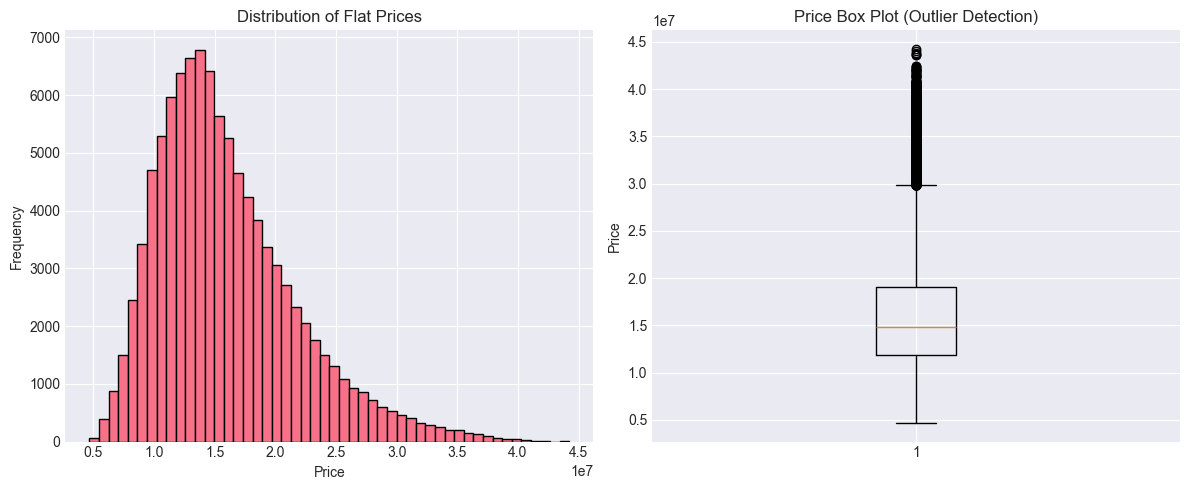

In [7]:
# Visualize price distribution
# Skewed distributions may require transformation for some models
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['price'], bins=50, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Flat Prices')

plt.subplot(1, 2, 2)
plt.boxplot(df['price'])
plt.ylabel('Price')
plt.title('Price Box Plot (Outlier Detection)')

plt.tight_layout()
plt.show()

## 4. Missing Values Analysis

In [8]:
# Check for missing values in each column
# Missing data requires imputation strategy in preprocessing
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Percentage': missing_pct
}).sort_values('Missing_Count', ascending=False)

print("Missing Values Summary:")
print(missing_df[missing_df['Missing_Count'] > 0])

if missing_df['Missing_Count'].sum() == 0:
    print("\nNo missing values found in the dataset!")

Missing Values Summary:
Empty DataFrame
Columns: [Missing_Count, Percentage]
Index: []

No missing values found in the dataset!


## 5. Numerical Features Analysis

In [9]:
# Identify numerical features for analysis
# Exclude 'index' as it's just an identifier
numerical_features = ['kitchen_area', 'bath_area', 'other_area', 'extra_area', 
                      'extra_area_count', 'year', 'ceil_height', 'floor_max', 
                      'floor', 'total_area', 'bath_count', 'rooms_count']

print(f"Number of numerical features: {len(numerical_features)}")

Number of numerical features: 12


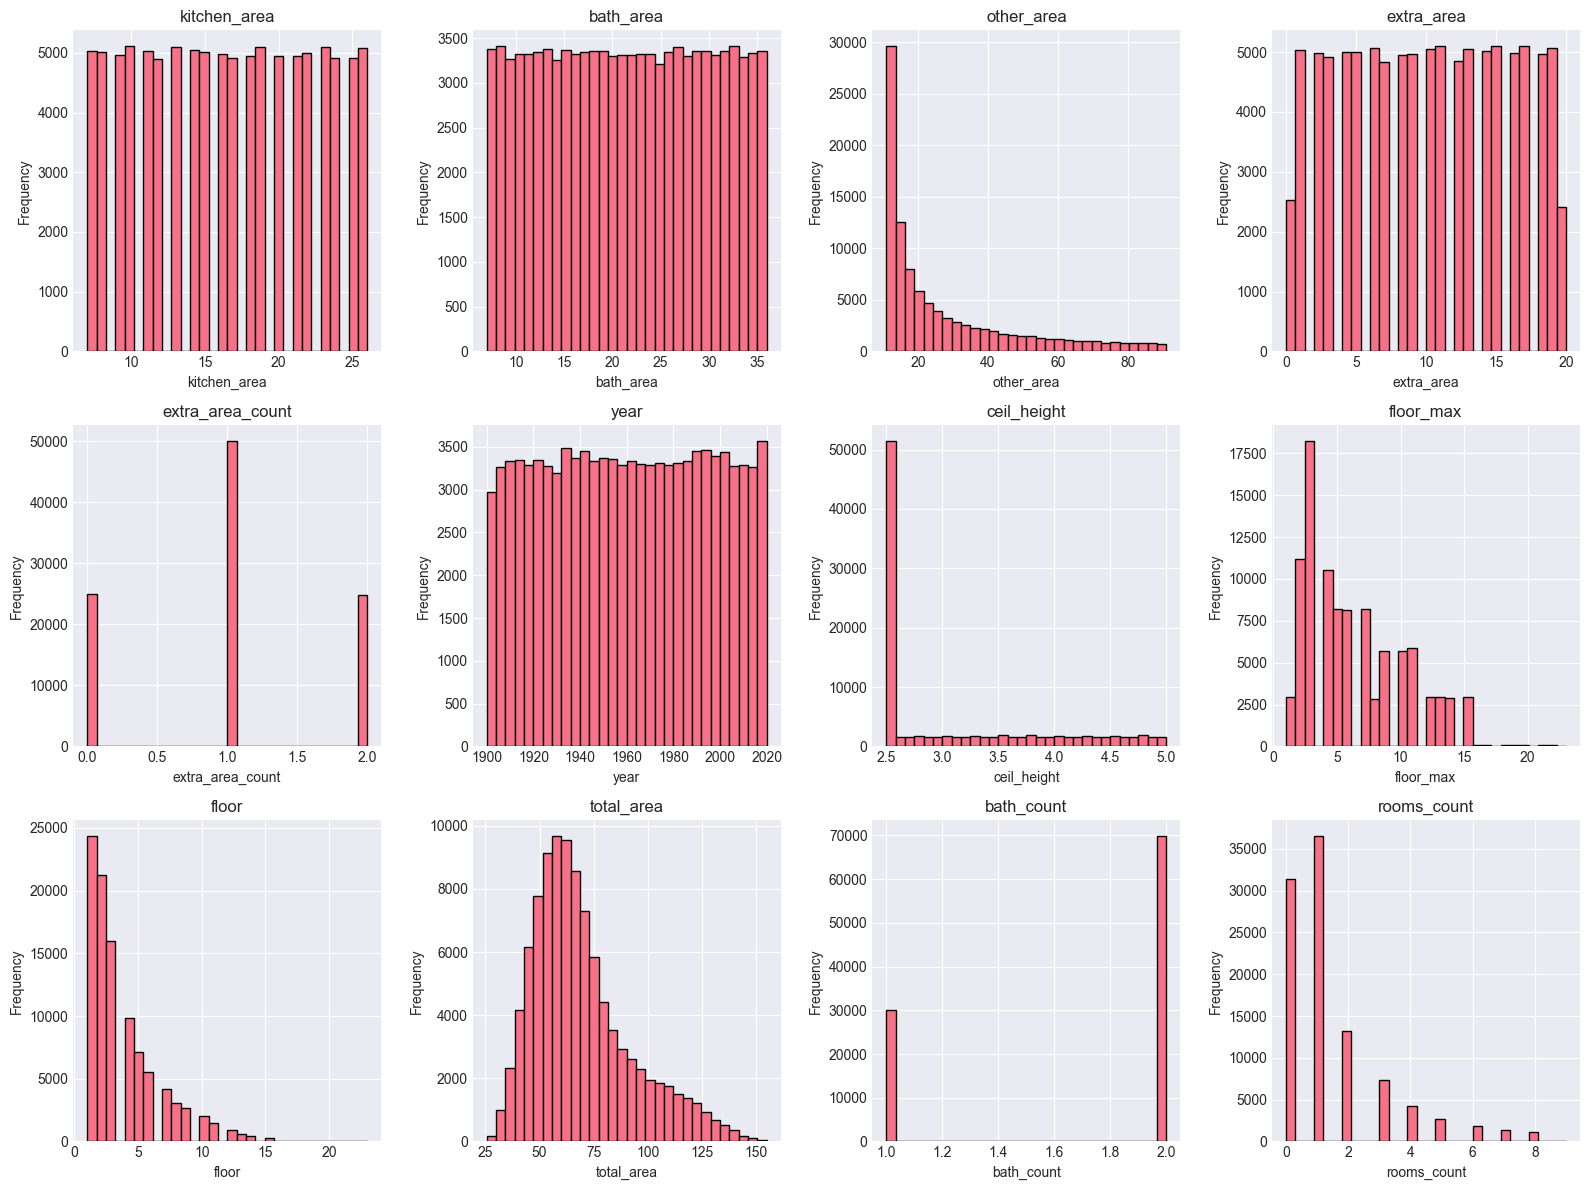

In [10]:
# Distribution of key numerical features
# Understanding distributions helps identify outliers and transformation needs
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.ravel()

for idx, col in enumerate(numerical_features):
    axes[idx].hist(df[col], bins=30, edgecolor='black')
    axes[idx].set_title(f'{col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 6. Categorical Features Analysis

In [11]:
# Identify categorical features
categorical_features = ['gas', 'hot_water', 'central_heating', 
                        'extra_area_type_name', 'district_name']

print("Categorical Features Cardinality:")
for col in categorical_features:
    print(f"{col}: {df[col].nunique()} unique values")

Categorical Features Cardinality:
gas: 2 unique values
hot_water: 2 unique values
central_heating: 2 unique values
extra_area_type_name: 2 unique values
district_name: 7 unique values


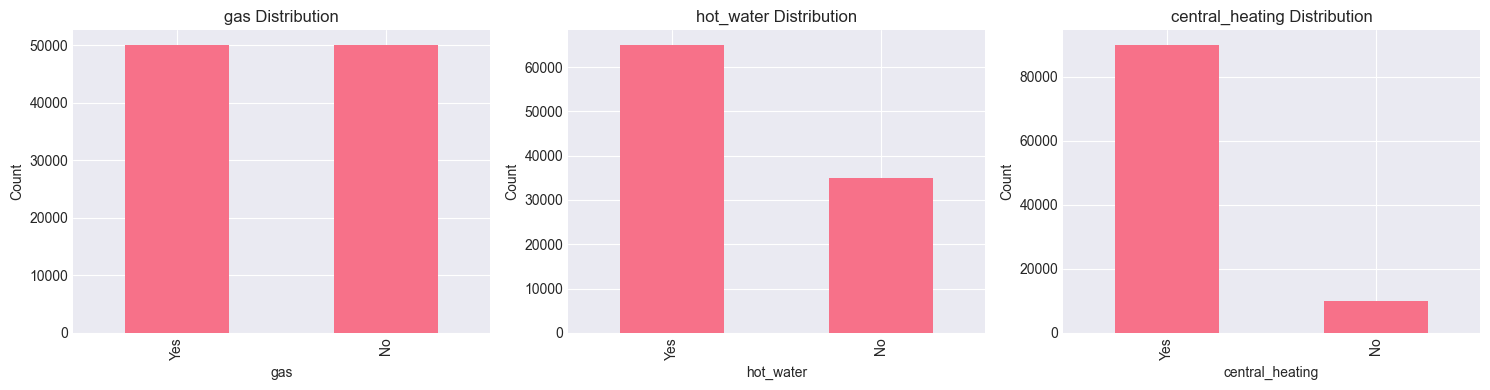

In [12]:
# Distribution of binary features
# Binary features (0/1) indicate presence/absence of amenities
binary_features = ['gas', 'hot_water', 'central_heating']

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, col in enumerate(binary_features):
    df[col].value_counts().plot(kind='bar', ax=axes[idx])
    axes[idx].set_title(f'{col} Distribution')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [13]:
# District name distribution
# High cardinality categorical variables may need special encoding (target encoding)
print(f"Number of unique districts: {df['district_name'].nunique()}")
print("\nTop 10 districts by frequency:")
print(df['district_name'].value_counts().head(10))

Number of unique districts: 7

Top 10 districts by frequency:
district_name
Moskovskij       14559
Petrogradskij    14391
Vyborgskij       14310
Nevskij          14301
Centralnyj       14269
Krasnoselskij    14149
Kirovskij        14021
Name: count, dtype: int64


In [14]:
# Extra area type distribution
print("Extra area type distribution:")
print(df['extra_area_type_name'].value_counts())

Extra area type distribution:
extra_area_type_name
balcony    50118
loggia     49882
Name: count, dtype: int64


## 7. Correlation Analysis

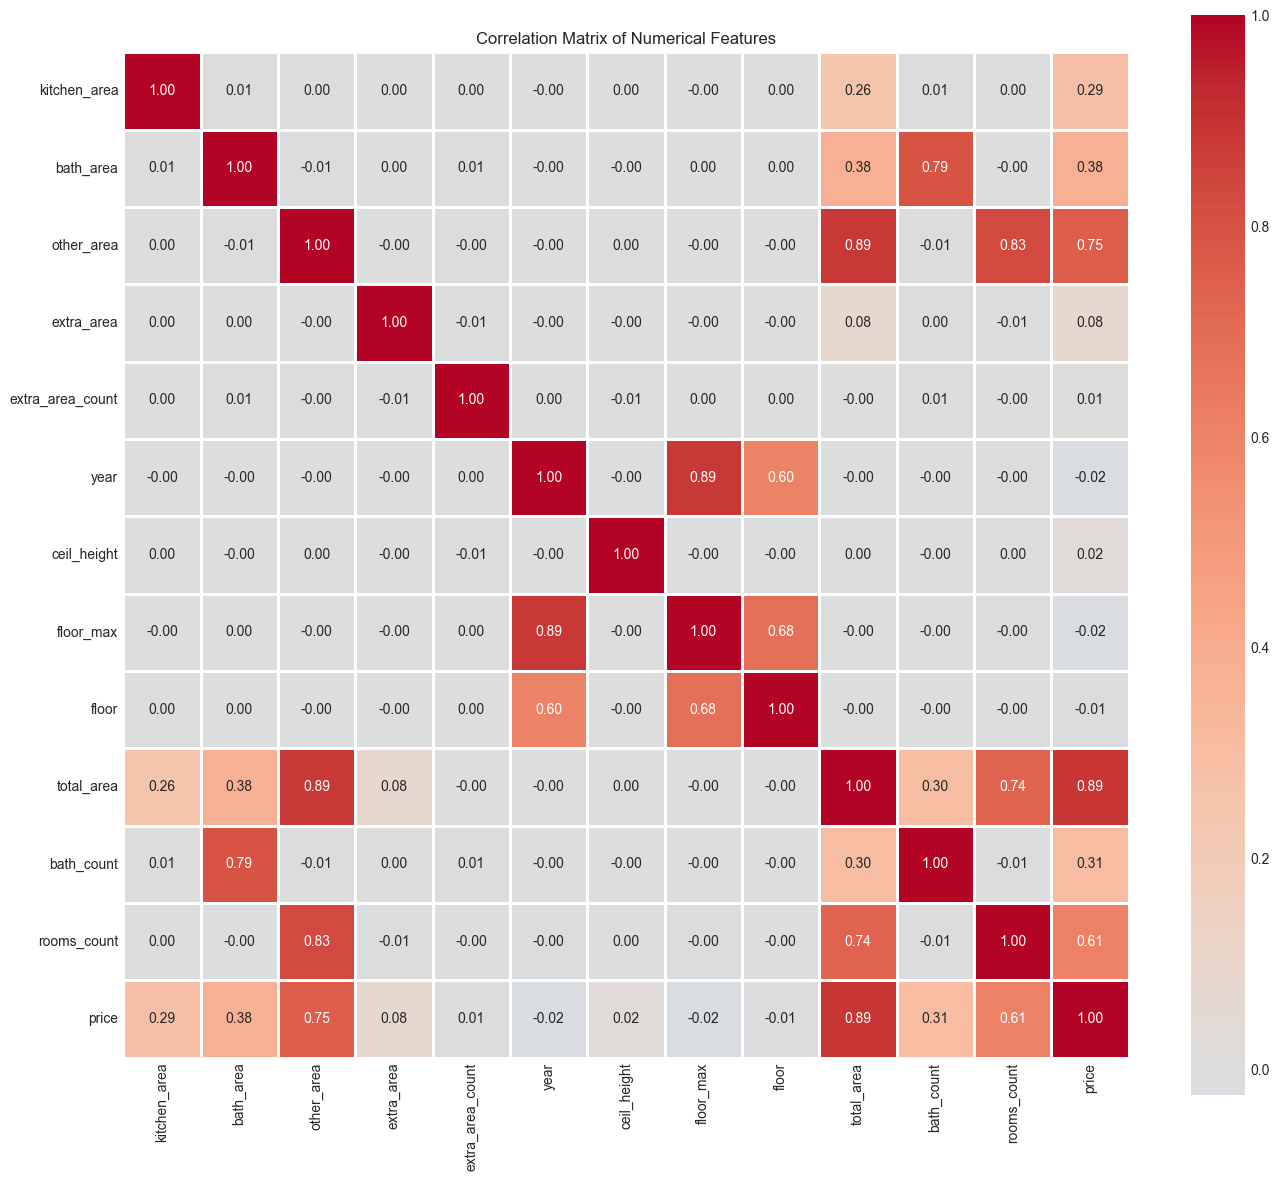

In [15]:
# Correlation matrix for numerical features
# High correlation (>0.8) indicates multicollinearity
# Correlation with price indicates predictive power
correlation = df[numerical_features + ['price']].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

In [16]:
# Features most correlated with price
# These features are likely to be important predictors
price_corr = correlation['price'].sort_values(ascending=False)
print("Features correlation with price:")
print(price_corr)

Features correlation with price:
price               1.000000
total_area          0.889008
other_area          0.752414
rooms_count         0.610168
bath_area           0.376584
bath_count          0.309558
kitchen_area        0.287984
extra_area          0.077201
ceil_height         0.024245
extra_area_count    0.011414
floor              -0.008325
floor_max          -0.023930
year               -0.024170
Name: price, dtype: float64


## 7.1 Multicollinearity Analysis

In [17]:
# Identify high correlation pairs (multicollinearity warning)
# Multicollinearity can cause instability in linear models
# Features with correlation > 0.8 are considered highly redundant

print("High Correlation Pairs (|r| > 0.80):")
print("="*60)

# Find pairs with high correlation
high_corr_pairs = []
for i in range(len(correlation.columns)):
    for j in range(i+1, len(correlation.columns)):
        if abs(correlation.iloc[i, j]) > 0.80:
            high_corr_pairs.append((
                correlation.columns[i],
                correlation.columns[j],
                correlation.iloc[i, j]
            ))

# Sort by correlation strength
high_corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

for feat1, feat2, corr_val in high_corr_pairs:
    print(f"  {feat1:20s} ↔ {feat2:20s} : {corr_val:.3f}")

print("\n" + "="*60)
print("CRITICAL INSIGHTS:")
print("="*60)
print("1. total_area ↔ other_area (0.89): VERY HIGH redundancy")
print("   → other_area adds minimal new information")
print("   → Recommendation: DROP other_area in preprocessing\n")

print("2. year ↔ floor_max (0.89): Newer buildings are taller")
print("   → Both features provide complementary information")
print("   → Recommendation: KEEP both (different aspects)\n")

print("3. rooms_count ↔ other_area (0.83): Strong correlation")
print("   → Dropping other_area resolves this too\n")

print("MULTICOLLINEARITY HANDLING STRATEGY:")
print("- Drop 'other_area' (redundant with total_area)")
print("- Use Ridge regression (L2 regularization) for linear models")
print("- Tree-based models (RF, XGBoost) handle multicollinearity naturally")

High Correlation Pairs (|r| > 0.80):
  total_area           ↔ price                : 0.889
  year                 ↔ floor_max            : 0.888
  other_area           ↔ total_area           : 0.886
  other_area           ↔ rooms_count          : 0.831

CRITICAL INSIGHTS:
1. total_area ↔ other_area (0.89): VERY HIGH redundancy
   → other_area adds minimal new information
   → Recommendation: DROP other_area in preprocessing

2. year ↔ floor_max (0.89): Newer buildings are taller
   → Both features provide complementary information
   → Recommendation: KEEP both (different aspects)

3. rooms_count ↔ other_area (0.83): Strong correlation
   → Dropping other_area resolves this too

MULTICOLLINEARITY HANDLING STRATEGY:
- Drop 'other_area' (redundant with total_area)
- Use Ridge regression (L2 regularization) for linear models
- Tree-based models (RF, XGBoost) handle multicollinearity naturally


## 8. Feature Relationships with Price

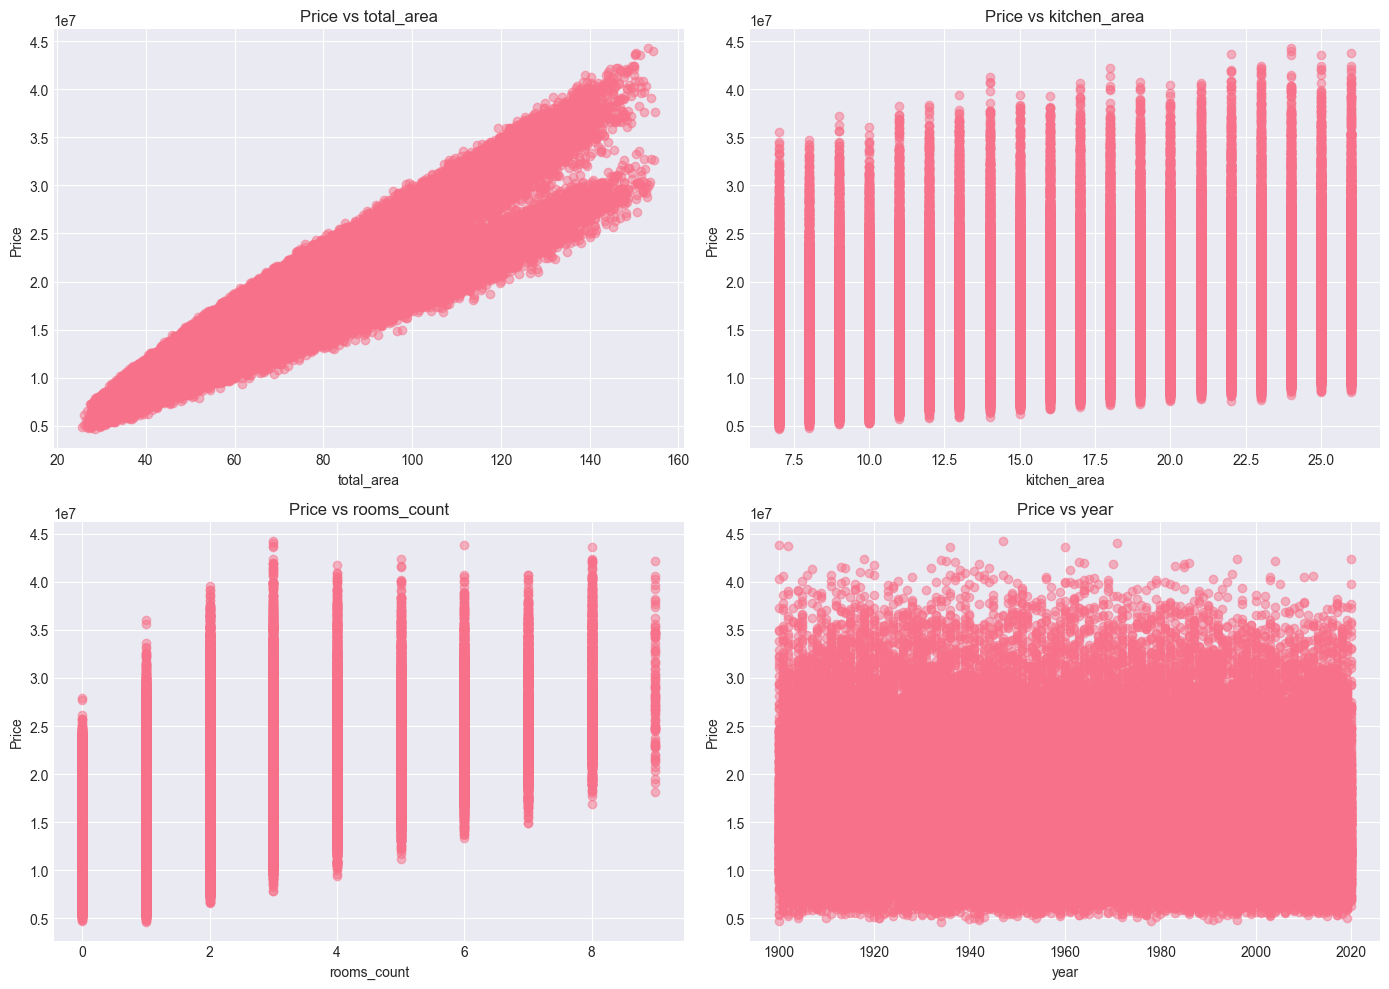

In [18]:
# Scatter plots for top correlated features
# Visual inspection reveals linear vs non-linear relationships
top_features = ['total_area', 'kitchen_area', 'rooms_count', 'year']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, col in enumerate(top_features):
    axes[idx].scatter(df[col], df['price'], alpha=0.5)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Price')
    axes[idx].set_title(f'Price vs {col}')

plt.tight_layout()
plt.show()

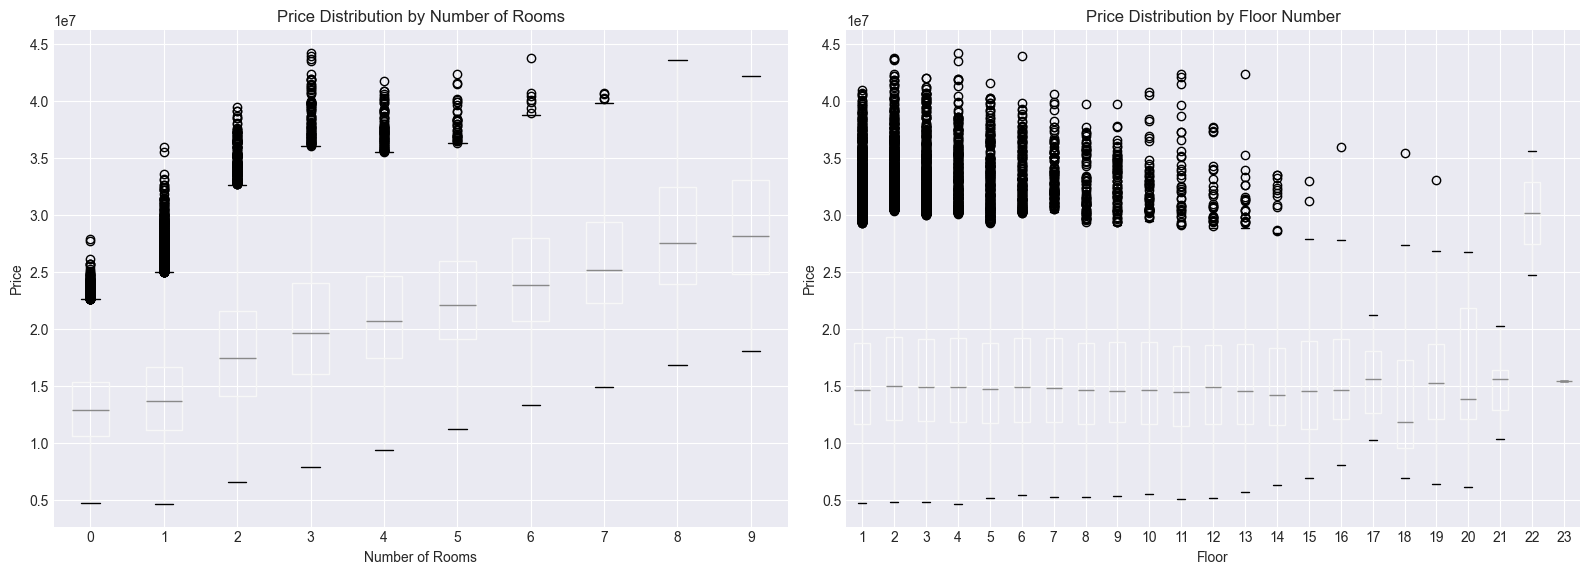

In [19]:
# Box plots for categorical features vs price
# Shows price distribution across categories
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Rooms count vs price
df.boxplot(column='price', by='rooms_count', ax=axes[0])
axes[0].set_title('Price Distribution by Number of Rooms')
axes[0].set_xlabel('Number of Rooms')
axes[0].set_ylabel('Price')

# Floor vs price (grouped for readability)
df.boxplot(column='price', by='floor', ax=axes[1])
axes[1].set_title('Price Distribution by Floor Number')
axes[1].set_xlabel('Floor')
axes[1].set_ylabel('Price')

plt.suptitle('')  # Remove default title
plt.tight_layout()
plt.show()

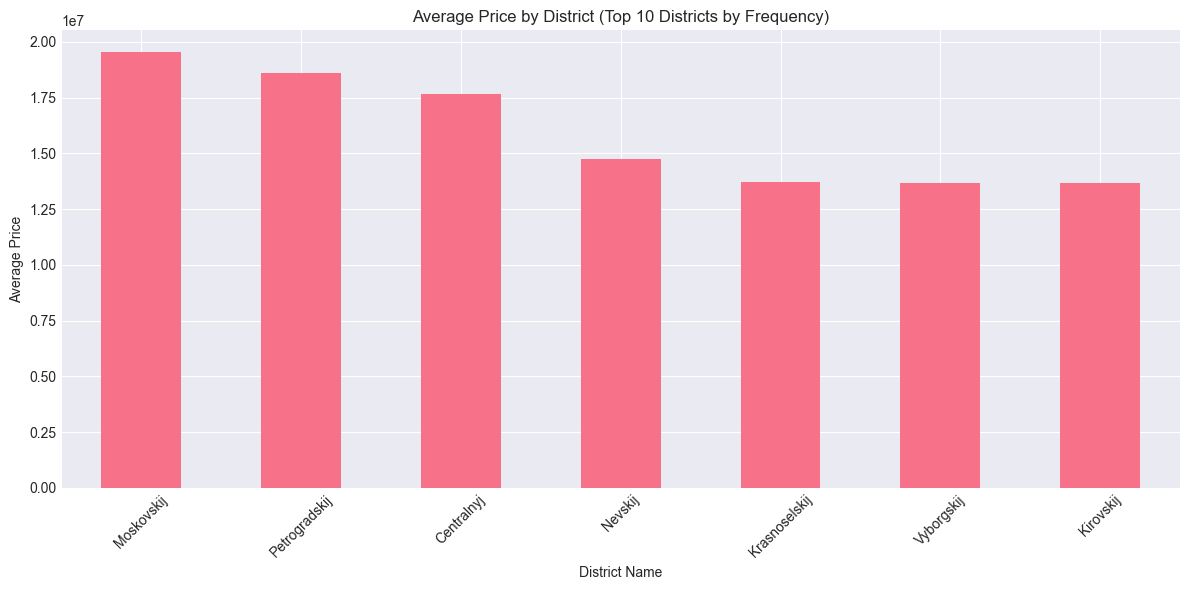

In [20]:
# Average price by district (top 10 districts)
# Location is typically a strong predictor in real estate
top_districts = df['district_name'].value_counts().head(10).index
district_price = df[df['district_name'].isin(top_districts)].groupby('district_name')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
district_price.plot(kind='bar')
plt.title('Average Price by District (Top 10 Districts by Frequency)')
plt.xlabel('District Name')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()